In [ ]:
import tensorflow as tf
import numpy as np
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Creating trained AI

1. Get Data Ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experementation
6. Save and load your trained model

In [ ]:
X = tf.constant(np.arange(5))
y = X + 5

y

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([5, 6, 7, 8, 9])>

In [ ]:
model = tf.keras.Sequential();
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 258ms/step - loss: 6.5723 - mae: 6.5723
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 6.5223 - mae: 6.5223
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 6.4723 - mae: 6.4723
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 6.4223 - mae: 6.4223
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 6.3723 - mae: 6.3723


In [ ]:
model.predict([10])

1/1 [==============================] - 0s 48ms/step


array([[3.1884813]], dtype=float32)

In [ ]:
X = tf.random.shuffle(tf.constant(np.arange(-300, 300, 2)))
y = X + 5

model = tf.keras.Sequential();
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
vals = np.arange(505, 565)
A = tf.constant(vals, dtype=tf.float32)
Ap = model.predict(A)

tf.math.round(np.squeeze(Ap)) - A
vals, tf.round(Ap), Ap

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
X = tf.random.shuffle(tf.constant(np.arange(-100, 100)))
y = X + 5

model = tf.keras.Sequential([
      tf.keras.layers.Dense(50, input_shape=[1], name="input_layer"),
      tf.keras.layers.Dense(1, name="output_layer"),
], name="my_model")

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

X, y

In [ ]:
X_train = X[:180];
y_train = y[:180];

X_test = X[180:];
y_test = y[180:];

In [ ]:
model.summary();

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
y_pred = model.predict(X_test);

y_pred, y_test

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


In [ ]:
evaluation = model.evaluate(X_test, y_test)
MAE = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
MAE2 = tf.keras.losses.MeanAbsoluteError()

evaluation, MAE, MAE2(y_test, tf.squeeze(y_pred)).numpy()

1/1 [==============================] - 0s 17ms/step - loss: 0.3626 - mae: 0.3626


([0.3625972270965576, 0.3625972270965576],
 <tf.Tensor: shape=(), dtype=float32, numpy=0.36259723>,
 0.36259723)

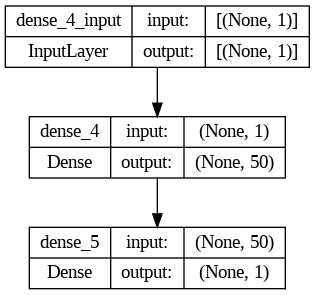

In [ ]:
from tensorflow.keras.utils import plot_model

X = tf.range(-100, 500, 2)
Y = X + 5

X_train = X[:230];
Y_train = Y[:230];

X_test = X[230:];
Y_test = Y[230:];

model = tf.keras.Sequential([
     tf.keras.layers.Dense(50),
     tf.keras.layers.Dense(1),
 ])

model.compile(loss=tf.keras.losses.mse, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mse"])

model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=150, verbose=0)
plot_model(model=model, show_shapes=True)

3/3 [==============================] - 0s 3ms/step


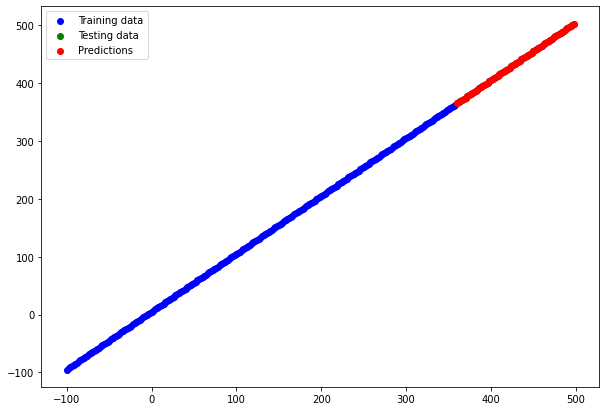

In [ ]:
Y_pred = model.predict(X_test)

plot_predictions(predictions=Y_pred, train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test)


In [ ]:
tf.keras.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred)), tf.keras.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))

(<tf.Tensor: shape=(), dtype=float32, numpy=0.00028294153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.337998e-08>)

In [ ]:
def R_squared(y, prediction):
  prediction = tf.cast(prediction, dtype=tf.int32)
  
  unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y, prediction)))
  total_error = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  return tf.subtract(1, tf.divide(unexplained_error, total_error))

R_squared(Y_test, tf.squeeze(Y_pred)).numpy()

1.0

In [ ]:
model.save("model_1")
model.save("model_1.h5")

In [ ]:
from tensorflow.keras.metrics import mean_absolute_error as mae
from tensorflow.keras.metrics import mean_squared_error as mse

loaded_model = tf.keras.models.load_model("/content/model_1")

Y_loaded_pred = loaded_model.predict(X_test)

mae(Y_test, tf.squeeze(Y_pred))
mae(Y_test, tf.squeeze(Y_loaded_pred))

Y_pred == Y_loaded_pred

## Medical Insurance cost

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot = insurance_one_hot.drop('sex_male', axis=1)
insurance_one_hot = insurance_one_hot.drop('smoker_no', axis=1)

In [ ]:
X_data = insurance_one_hot.drop("charges", axis=1)
Y_data = insurance_one_hot['charges']

X_data

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,0,0,0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12275.4580 - mae: 12275.4580
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7669.7949 - mae: 7669.7949
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7091.3687 - mae: 7091.3687
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6963.4482 - mae: 6963.4482
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6787.9512 - mae: 6787.9512
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6657.2666 - mae: 6657.2666
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6602.2646 - mae: 6602.2646
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6605.5522 - mae: 6605.5522
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6582.7354 - mae: 6582.7354
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6535.2534 - mae: 6535.25

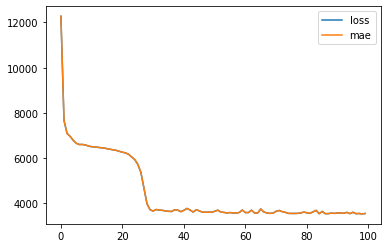

In [ ]:
# building a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(80),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
history = insurance_model.fit(X_train, Y_train, epochs=100)

pd.DataFrame(history.history).plot()

In [ ]:
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3294.3035 - mae: 3294.3035


[3294.303466796875, 3294.303466796875]

In [ ]:
Y_pred = insurance_model.predict(X_test)


9/9 [==============================] - 0s 2ms/step


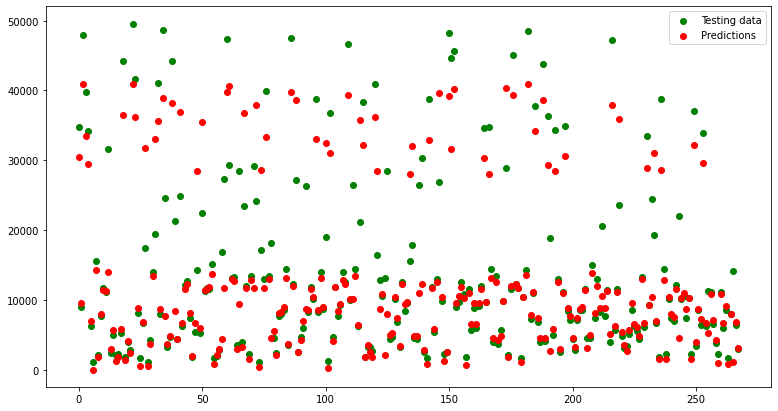

In [ ]:
from tensorflow.keras.metrics import mean_absolute_error as mae
from tensorflow.keras.metrics import mean_squared_error as mse

def plot_predictions(test_X, test_Y, pred_Y):
  plt.figure(figsize=(13, 7))
  plt.scatter(test_X, test_Y, c="g", label="Testing data")
  plt.scatter(test_X, pred_Y, c="r", label="Predictions")
  plt.legend()

plot_predictions(tf.range(0, len(Y_test)), Y_test, tf.squeeze(Y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

def model_report(y_test, y_pred):
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")

model_report(Y_test, Y_pred)

MAE: 3294.303339955164
MSE: 36051927.40309632
R2: 0.7736599815715732


In [ ]:
from google.colab import files

insurance_model.save('insurance_model.h5')
files.download('insurance_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
) 

X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# building a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(80),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
history = insurance_model.fit(X_train_normal, Y_train, epochs=100)

pd.DataFrame(history.history).plot()

In [19]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

Y_pred = insurance_model.predict(X_test_normal)

def model_report(y_test, y_pred):
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")

model_report(Y_test, Y_pred)

9/9 [==============================] - 0s 3ms/step
MAE: 3464.0786335332427
MSE: 47964754.4270096
R2: 0.7033303045606547
